In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("C:/datascience/projects/churn analysis/Customer Churn.csv")

In [8]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.shape

(7043, 21)

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Replaced blanks in TotalCharges Column with a 0 since tenure is 0

In [13]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype(float)



In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
df.duplicated().sum()

0

In [19]:
## to check whether there exists more than one record for the same customer
df['customerID'].duplicated().sum()

0

In [20]:
## made a function convert to convert values 1 and 0 into yes and no in the dataframe
def convert(value):
    if value==1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen']=df['SeniorCitizen'].apply(convert)

In [21]:
df['SeniorCitizen']

0        no
1        no
2        no
3        no
4        no
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: SeniorCitizen, Length: 7043, dtype: object

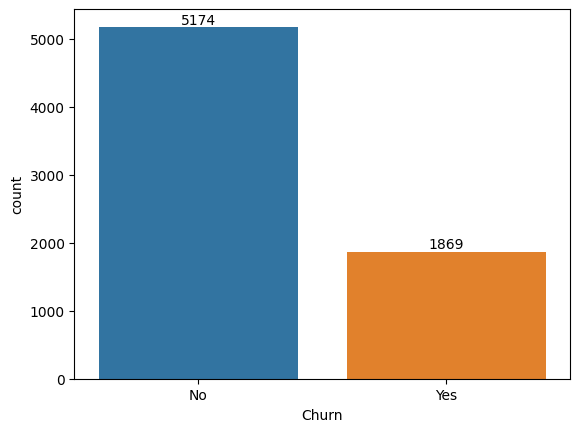

In [24]:
ax=sns.countplot(x='Churn',hue='Churn',data=df)

for bars in ax.containers:
   ax.bar_label(bars)


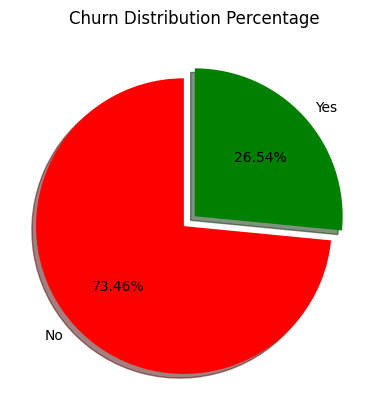

In [32]:
# groups the data by the values in the Churn column;
# Then, it counts how many times each Churn value appears

gb = df.groupby('Churn').agg({'Churn': "count"})
explode=(0.1,0)
colors=['red','green']
plt.pie(gb['Churn'], labels=gb.index, colors=colors,explode=explode,autopct='%1.2f%%', startangle=90,shadow=True)
plt.title("Churn Distribution Percentage")
plt.show()

From the given piechart we can say 26.54% of our customers have churned out


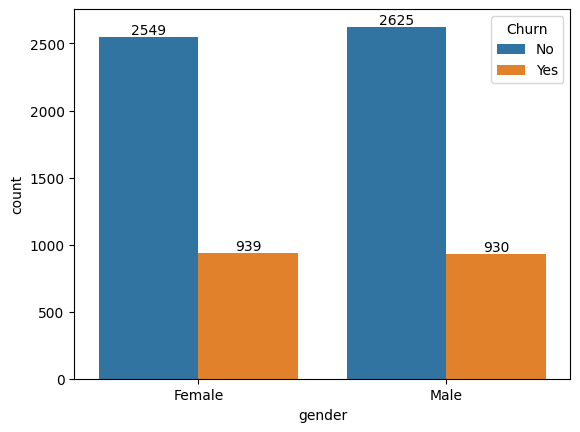

In [41]:
genders=sns.countplot(x='gender',hue='Churn',data=df)

for bars in genders.containers:
    genders.bar_label(bars)

Both stats are almost same. Precisely more Female customers have Churned

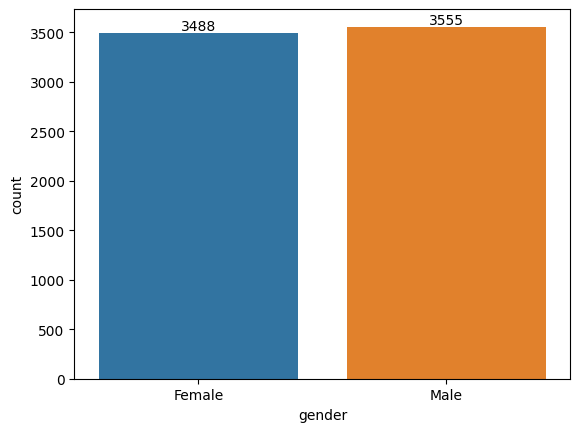

In [42]:
genders=sns.countplot(x='gender',hue='gender',data=df)
for bars in genders.containers:
    genders.bar_label(bars)

Both genders are almost equal with male population slightly higher

<Axes: xlabel='SeniorCitizen', ylabel='count'>

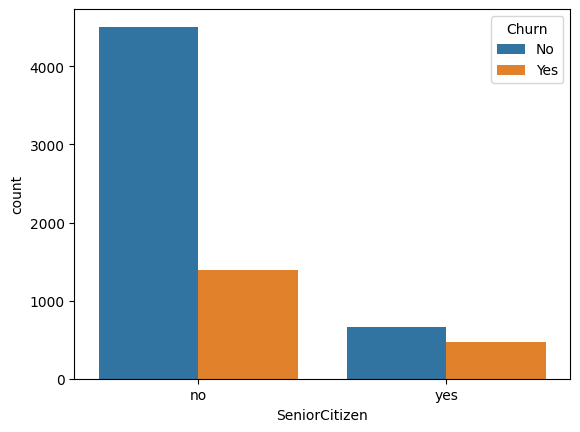

In [44]:
 sns.countplot(x='SeniorCitizen',hue='Churn',data=df)

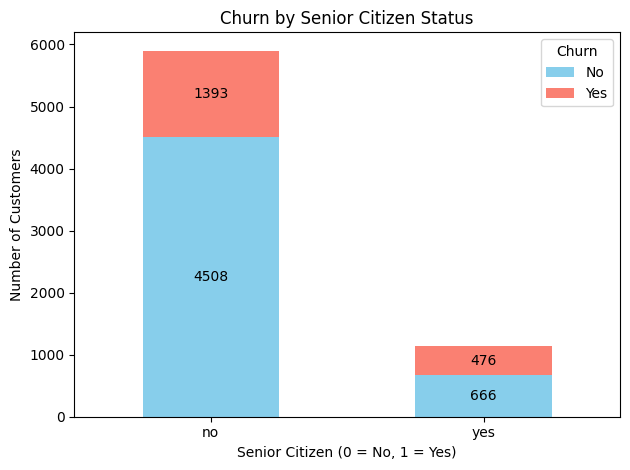

In [ ]:
# We create a stacked bar chart 
cross_tab = pd.crosstab(df['SeniorCitizen'], df['Churn'])

ax = cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

for container in ax.containers:
    ax.bar_label(container, label_type='center')


plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Less senior citizens comparatively;less senior citizens have churned similar to non-senior citizens 

Text(0.5, 1.0, 'Count of customers according to the contract')

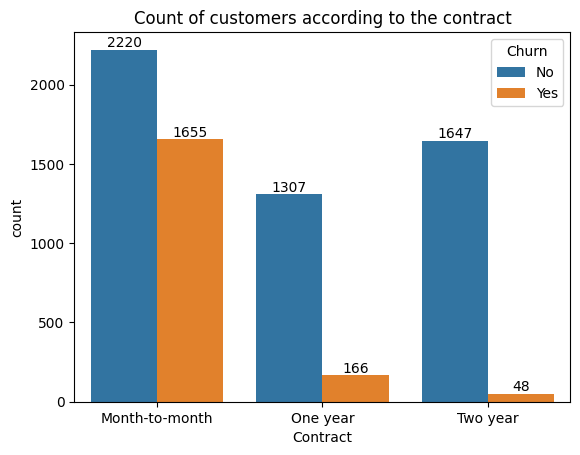

In [53]:
contracts=sns.countplot(x='Contract',data=df,hue='Churn')

for bars in contracts.containers:
    contracts.bar_label(bars)

plt.title("Count of customers according to the contract")

Customers having a month to month contact are likely to Churn out


Instead of writing 9 separate plots manually, we use a loop and subplots to make all the plots in one figure.



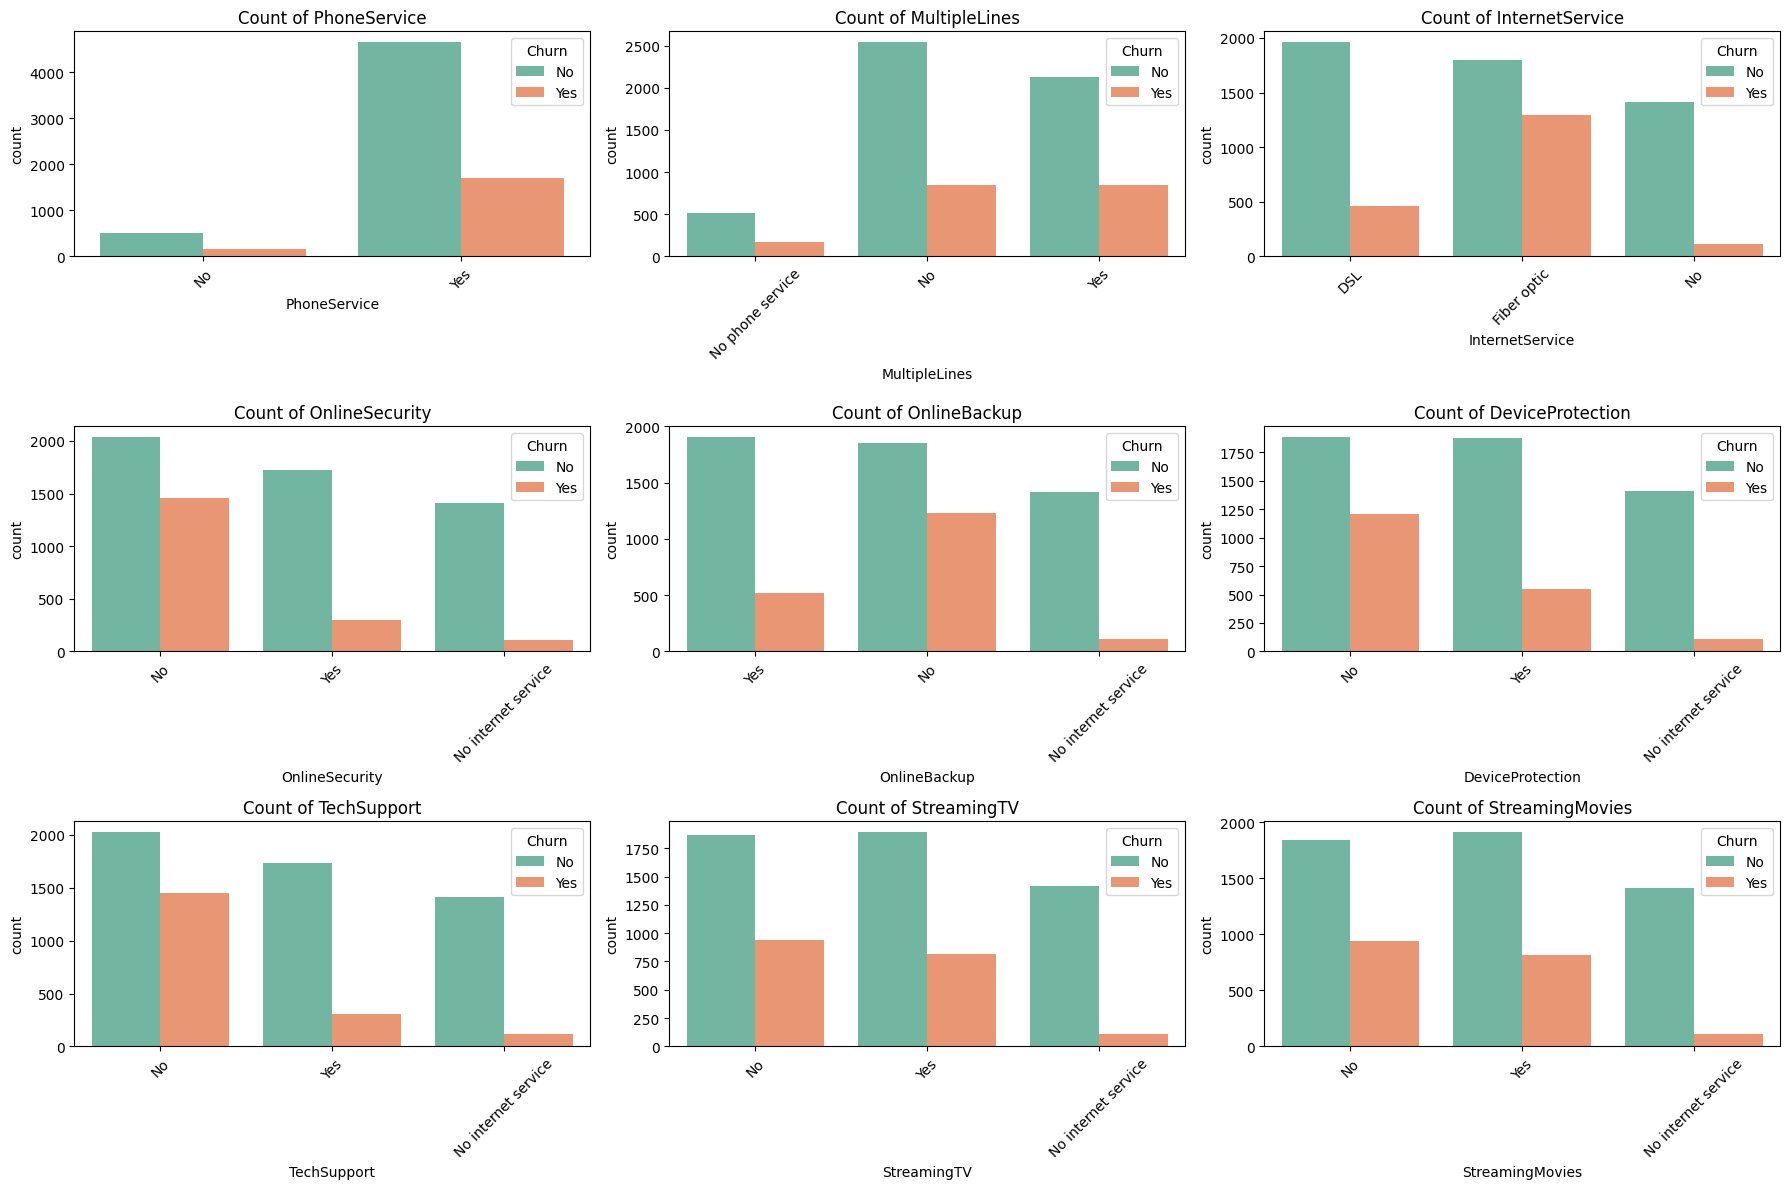

In [56]:

cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies']

#subplot layout
n_cols = 3  
n_rows = (len(cols) + n_cols - 1) // n_cols  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))

axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette='Set2',hue='Churn')
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Having phone service doesn’t strongly correlate with churn, but churn still exists within that group.

Slightly higher churn in customers with multiple lines.

Fiber optic users are more likely to churn — possibly due to pricing, service issues, or unmet expectations.

Online security service seems to help retain customers.

Online backup appears to slightly reduce churn.

Another service that increases retention.

Tech support is a major churn reducer.

StreamingTV does not show a strong churn pattern.

Minimal impact of streaming services on churn behavior.


Text(0.5, 1.0, 'Count of customers according to the Payment Methods')

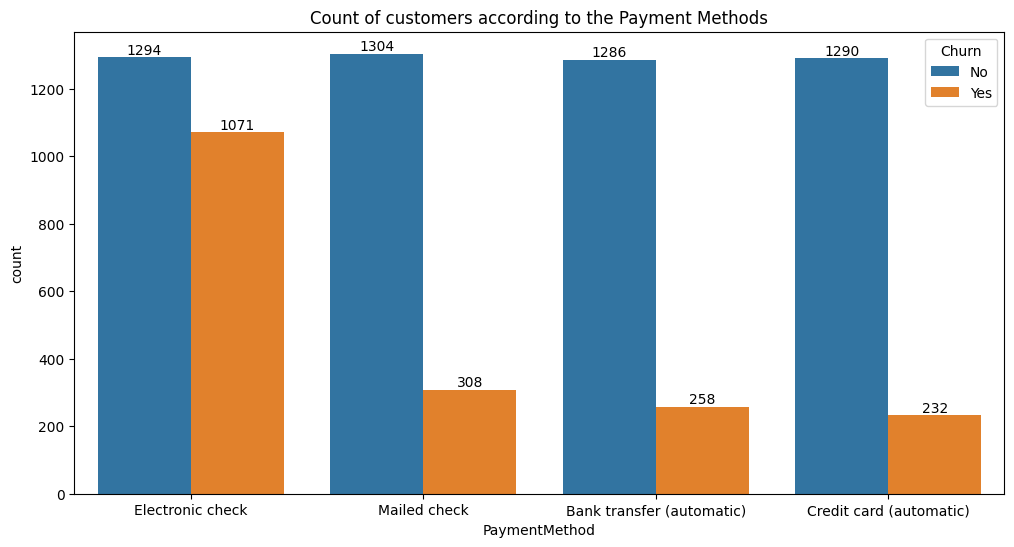

In [65]:
plt.figure(figsize=(12,6))
payments=sns.countplot(x='PaymentMethod',data=df,hue='Churn')

for bars in payments.containers:
    payments.bar_label(bars)

plt.title("Count of customers according to the Payment Methods")

Customers using electronic checks have the highest churn rate, while those using automatic payments (bank transfer or credit card) are least likely to churn.

*CONCLUSION:*
This exploratory data analysis uncovered several key patterns contributing to customer churn. Among the most influential factors, contract type, payment method, tenure, and internet service type stand out as critical predictors.

Month-to-month contracts are strongly associated with higher churn (42%), whereas long-term contracts (1-2 years) show significantly lower churn rates (11% and 3%), highlighting the value of commitment-based retention strategies.

Customers using electronic checks as a payment method churn at a notably higher rate (45%) compared to those using credit cards, bank transfers, or mailed checks (15–18%), suggesting that payment method stability correlates with customer loyalty.

Tenure is a clear driver of retention: customers in their first year churn at 50%, dropping to just 15% after three years, emphasizing the importance of early engagement and onboarding efforts.

Users of fiber optic internet services churn more (30%) than DSL users (20%), possibly due to dissatisfaction or higher expectations with premium services.

Lastly, senior citizens (age 65+) show a higher churn rate (41%) compared to non-seniors (26%), indicating a need for personalized support and retention strategies for this demographic.

Overall, these findings can help guide strategic interventions—such as promoting longer contracts, offering more secure payment methods, and strengthening customer support for at-risk groups—to significantly reduce churn and enhance customer retention.
